<a href="https://colab.research.google.com/github/arfianaja/yolov5_train/blob/main/yoga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Check the version of TensorFlow
print("Versi TensorFlow :", tf.__version__)

# Check the version of Keras (which is integrated into TensorFlow as tf.keras)
print("Versi Keras      :", keras.__version__)

Versi TensorFlow : 2.12.0
Versi Keras      : 2.12.0


In [1]:
#hapus folder
!rm -r /content/awan

In [2]:
!unzip '/content/drive/MyDrive/yoga/mogafix/data.zip'

Archive:  /content/drive/MyDrive/yoga/mogafix/data.zip
   creating: training/
   creating: training/test/
   creating: training/test/cumulunimbus/
  inflating: training/test/cumulunimbus/039abf2d-64cf-4169-84e3-9a6c29c681ad_jpg.rf.d15246c03618a38efaa33774d11637ec.jpg  
  inflating: training/test/cumulunimbus/077d70f0-88c8-4155-b8f6-1ebea3c7e4ca_jpg.rf.546fa51cc79975c7e2b80731baf163cb.jpg  
  inflating: training/test/cumulunimbus/07b81b7a-8ef2-4444-b7c5-817d6eb4083c_jpg.rf.63ccb4614798b36c0ac056592fd7d53c.jpg  
  inflating: training/test/cumulunimbus/11766d3c-44aa-4d17-8cca-75538393447c_jpg.rf.0298e64de1fb117609046c45e8d9b1ec.jpg  
  inflating: training/test/cumulunimbus/12191fa4-1830-4ec3-8655-3df8093fd650_jpg.rf.20a1d49a503cc5e0266f3f4439d2b4ce.jpg  
  inflating: training/test/cumulunimbus/123cfef3-a470-4fe9-8db5-5c98fa63fd8b_jpg.rf.ef10f9c5f8c16a9acb4bd96a17d14358.jpg  
  inflating: training/test/cumulunimbus/13bbf10e-cb64-4e5a-b0f5-8198ef016f9b_jpg.rf.f57c1139102ffbeedf196227f967fe0

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
base_dir = '/content/skripsi'

In [6]:
import os
import cv2
import random
import numpy as np


img_size_150p = 128 # Actually dataset size (Untuk dipakai di Arsitektur CNN Custom)  # ⚠️ SESUAIKAN ⚠️
img_size_224p = 224 # Increase dataset size (untuk dipakai di Arsitektur MobileNetV2) # ⚠️ SESUAIKAN ⚠️

path_test  = '/content/training/test'                            # ⚠️ SESUAIKAN ⚠️
path_train   = '/content/training/train'                             # ⚠️ SESUAIKAN ⚠️
path_validation = '/content/training/valid'                             # ⚠️ SESUAIKAN ⚠️
categories  = ['cumulunimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']  # ⚠️ SESUAIKAN ⚠️

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Ambil label sebagai index (number)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])

    return imageData

datatest   = create_data_img(path_test)
datatrain    = create_data_img(path_train)
datavalidation    = create_data_img(path_validation)

# Shuffle Data Train (kalo enggak di shuffle, nanti data train ngurut berdasarkan labels)
random.seed(10) # 10 sebagai index shuffle, agar saat run ulang nanti hasil shuffle sama
random.shuffle(datatrain)

In [7]:
# X untuk Features & y untuk labels
X_train, y_train, X_test, y_test, X_validation, y_validation = [], [], [], [], [], []

for features, label in datatest:
    X_train.append(features)
    y_train.append(label)

for features, label in datatrain:
    X_test.append(features)
    y_test.append(label)

for features, label in datavalidation:
    X_validation.append(features)
    y_validation.append(label)

# -1 di reshape artinya membiarkan numpy menentukan dimensi data yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)
X_validation  = np.array(X_validation).reshape(-1, img_size_224p, img_size_224p, 3)
y_validation  = np.asarray(y_validation)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)
print("X_validation  :", X_validation.shape)
print("y_validation  :", y_validation.shape)

X_train : (501, 224, 224, 3)
y_train : (501,)
X_test  : (2424, 224, 224, 3)
y_test  : (2424,)
X_validation  : (502, 224, 224, 3)
y_validation  : (502,)


In [8]:
print("Isi Array X_train :\n\n", X_train[0]) # Ambil contoh data pertama
print("\nIsi Array X_test  :\n\n", X_test[0])
print("\nIsi Array X_validation  :\n\n", X_validation[0])

def prep_pixels(train, test, validation):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    validation_norm = validation.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    validation_norm = validation_norm / 255.0
    # return normalized images
    return train_norm, test_norm, validation_norm

X_train_norm, X_test_norm, X_validation_norm = prep_pixels(X_train, X_test, X_validation)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])
print("\nIsi Array X_validation_norm  :\n\n", X_validation_norm[0])

Isi Array X_train :

 [[[20 39 71]
  [20 39 71]
  [20 39 71]
  ...
  [18 37 69]
  [18 37 69]
  [18 37 69]]

 [[20 39 71]
  [20 39 71]
  [20 39 71]
  ...
  [18 37 69]
  [18 37 69]
  [18 37 69]]

 [[20 39 71]
  [20 39 71]
  [20 39 71]
  ...
  [18 37 69]
  [18 37 69]
  [18 37 69]]

 ...

 [[44 31 40]
  [46 33 42]
  [49 36 45]
  ...
  [36 24 38]
  [33 21 35]
  [30 18 32]]

 [[47 34 44]
  [48 35 45]
  [49 36 46]
  ...
  [39 27 41]
  [36 24 38]
  [32 20 34]]

 [[55 42 52]
  [54 41 51]
  [53 40 50]
  ...
  [40 28 42]
  [37 25 39]
  [33 21 35]]]

Isi Array X_test  :

 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Isi Array X_valida

In [9]:
from keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)
print("Isi Array y_validation  :", y_validation)

# one hot encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)
y_validation_encode  = to_categorical(y_validation)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)
print("\nIsi Array y_validation_encode :\n\n", y_validation_encode)

Isi Array y_train : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 

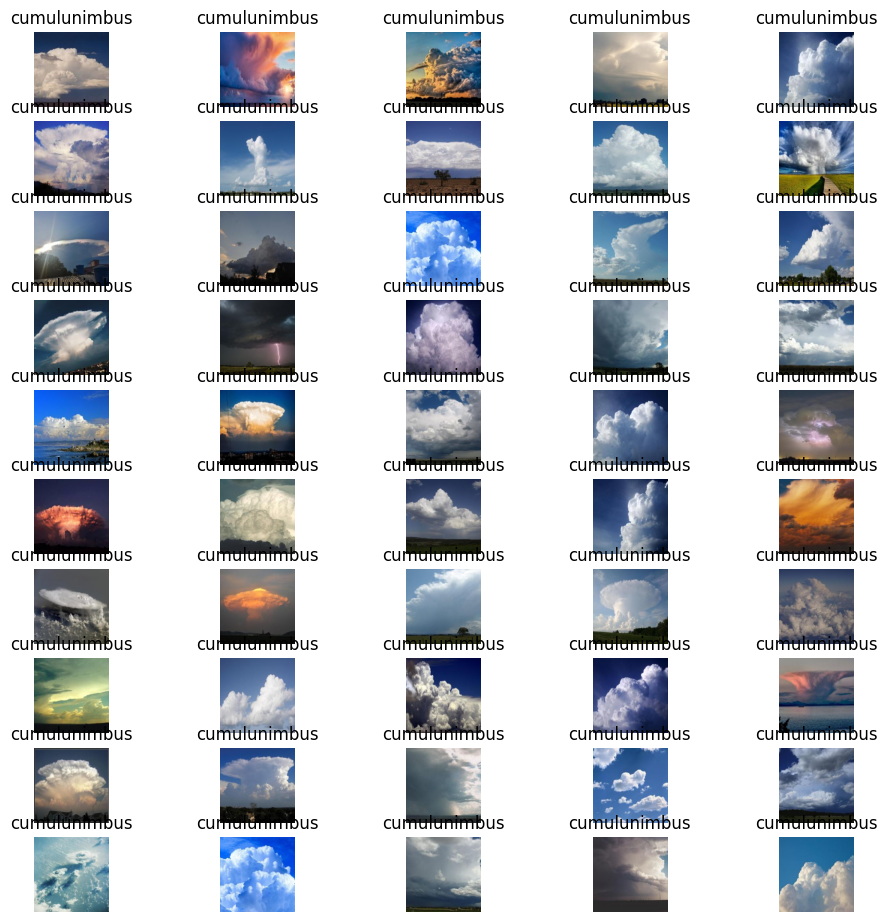

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 10   # ⚠️ SESUAIKAN ⚠️
ncols = 5  # ⚠️ SESUAIKAN ⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])   # Show features/images
        if y_train[temp] == 0:          # ⚠️ SESUAIKAN ⚠️
            judul = "cumulunimbus"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 1:        # ⚠️ SESUAIKAN ⚠️
            judul = "cumulus"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 2:        # ⚠️ SESUAIKAN ⚠️
            judul = "nimbostratus"         # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 3:        # ⚠️ SESUAIKAN ⚠️
            judul = "stratocumulus"           # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 4:        # ⚠️ SESUAIKAN ⚠️
            judul = "stratus"      # ⚠️ SESUAIKAN ⚠️
        ax[i,j].set_title(judul)        # Show labels
        ax[i,j].axis('off')             # Hide axis
plt.show()


In [13]:
import gc     # Gabage collector for cleaning deleted data from memory (in case : Clear list that are useless)

del datatrain
del datatest
del datavalidation
del X_train
del X_test
del X_validation
#del y_train  # Dipakai nanti untuk confusion Matrix
#del y_test   # Dipakai nanti untuk confusion Matrix
#del y_validation   # Dipakai nanti untuk confusion Matrix

gc.collect()


106682

In [14]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)
print("X_validation_norm      :", X_validation_norm.shape)
print("y_validation_encode    :", y_validation_encode.shape)

X_train_norm     : (501, 224, 224, 3)
y_train_encode   : (501, 5)
X_test_norm      : (2424, 224, 224, 3)
y_test_encode    : (2424, 5)
X_validation_norm      : (502, 224, 224, 3)
y_validation_encode    : (502, 5)


9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

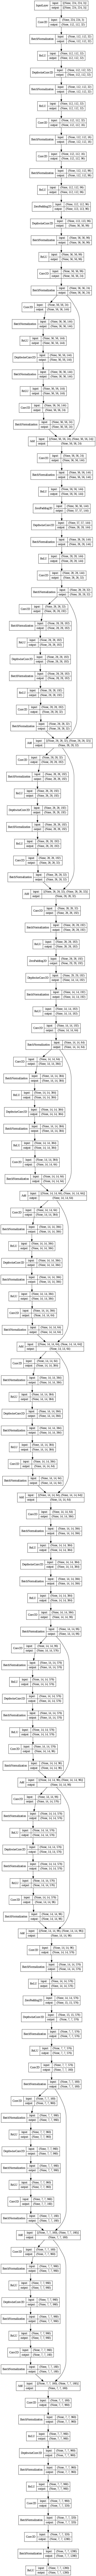

In [15]:
from keras.applications import MobileNetV2
from keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3)) # ⚠️ SESUAIKAN ⚠️
conv_base.trainable = False                                                                                   # ⚠️ SESUAIKAN ⚠️
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


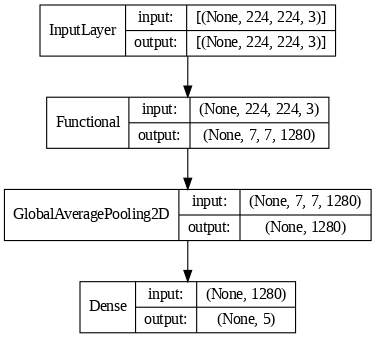

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()

    # 01-Feature Extractor Layer
    model.add(conv_base)                        # Feature Extractor pakai pre-trained model
    model.add(GlobalAveragePooling2D())

    # 02-Flatten Layer
    #model.add(Flatten())

    # 03-Fully Connected Layer
    #model.add(Dense(128, activation='relu'))    # ⚠️ SESUAIKAN ⚠️
    #model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    #model.add(Dense(64, activation='relu'))     # ⚠️ SESUAIKAN ⚠️
    #model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    model.add(Dense(5, activation='softmax'))   # ⚠️ SESUAIKAN ⚠️

    # Compile Model
    opt = Adam(learning_rate=0.0003)                       # ⚠️ SESUAIKAN ⚠️
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # ⚠️ SESUAIKAN ⚠️
    return model

# Bersihkan model sebelumnya (keperluan re-training)
if "model" in globals(): # Check jika apakah variable model ada?
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

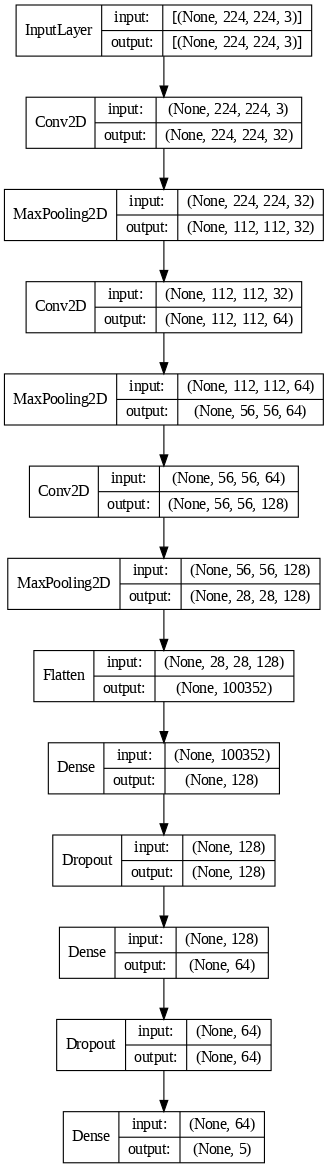

In [17]:
# Referensi Arsitektur: https://www.tensorflow.org/tutorials/images/classification

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model

def define_model_kustom():
    model = Sequential()

    # 01-Feature Extractor Layer
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(img_size_224p, img_size_224p, 3))) # ⚠️ Sesuaikan Input Shape
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 02-Flatten Layer
    model.add(Flatten())

    # 03-Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5, seed=5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5, seed=5))
    model.add(Dense(5, activation='softmax'))

    # Compile Model
    opt = Adam(learning_rate=0.0003)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_kustom()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80) # TB (Top Bottom) / LR (Left Right)


In [18]:
os.mkdir("/content/simpan_model") # Buat folder untuk save model report (run 1x)

In [19]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=5):  # ⚠️ SESUAIKAN ⚠️ (Hanya Data Train yang digunakan, nanti dipecah jadi Train & Validasi oleh library)
    epochs = 150                               # ⚠️ SESUAIKAN ⚠️
    batch_size = 64                           # ⚠️ SESUAIKAN ⚠️

    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1) # ⚠️ SESUAIKAN ⚠️ (1 sebagai seed/index shuffle, agar saat run ulang nanti hasil shuffle sama)

    i = 0
    # enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        # define model
        model = define_model_mobilenetv2()    # ⚠️ SESUAIKAN ⚠️
        # select rows for train and test
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1)
        # evaluate model
        loss, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
        print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
        # append scores
        scores.append(acc)
        histories.append(history)

        #----------------------------- Additional -----------------------------#

        # 01 - Save model as h5
        model.save("/content/simpan_model/model_fold_" + str(i) + ".h5")

        # 02 - Save model report to csv
        model_csv = pd.DataFrame(history.history)
        csv_file = "/content/simpan_model/model_fold_" + str(i) + ".csv"
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)

        # 03 - Clean the RAM for every Fold
        del trainX
        del trainY
        del valX
        del valY
        del model
        gc.collect()

        #----------------------------------------------------------------------#

    return scores, histories

scores, histories = evaluate_model(X_train_norm, y_train_encode)

Epoch 1/150
7/7 [==============================] - 14s 433ms/step - loss: 1.8962 - accuracy: 0.1625 - val_loss: 1.6413 - val_accuracy: 0.2574
Epoch 2/150
7/7 [==============================] - 1s 125ms/step - loss: 1.7116 - accuracy: 0.2450 - val_loss: 1.5566 - val_accuracy: 0.3663
Epoch 3/150
7/7 [==============================] - 1s 127ms/step - loss: 1.6036 - accuracy: 0.3075 - val_loss: 1.4916 - val_accuracy: 0.3762
Epoch 4/150
7/7 [==============================] - 1s 99ms/step - loss: 1.5231 - accuracy: 0.3600 - val_loss: 1.4280 - val_accuracy: 0.4158
Epoch 5/150
7/7 [==============================] - 1s 100ms/step - loss: 1.4501 - accuracy: 0.3825 - val_loss: 1.3764 - val_accuracy: 0.4455
Epoch 6/150
7/7 [==============================] - 1s 100ms/step - loss: 1.3923 - accuracy: 0.4150 - val_loss: 1.3371 - val_accuracy: 0.4653
Epoch 7/150
7/7 [==============================] - 1s 100ms/step - loss: 1.3450 - accuracy: 0.4575 - val_loss: 1.3099 - val_accuracy: 0.5248
Epoch 8/150
7

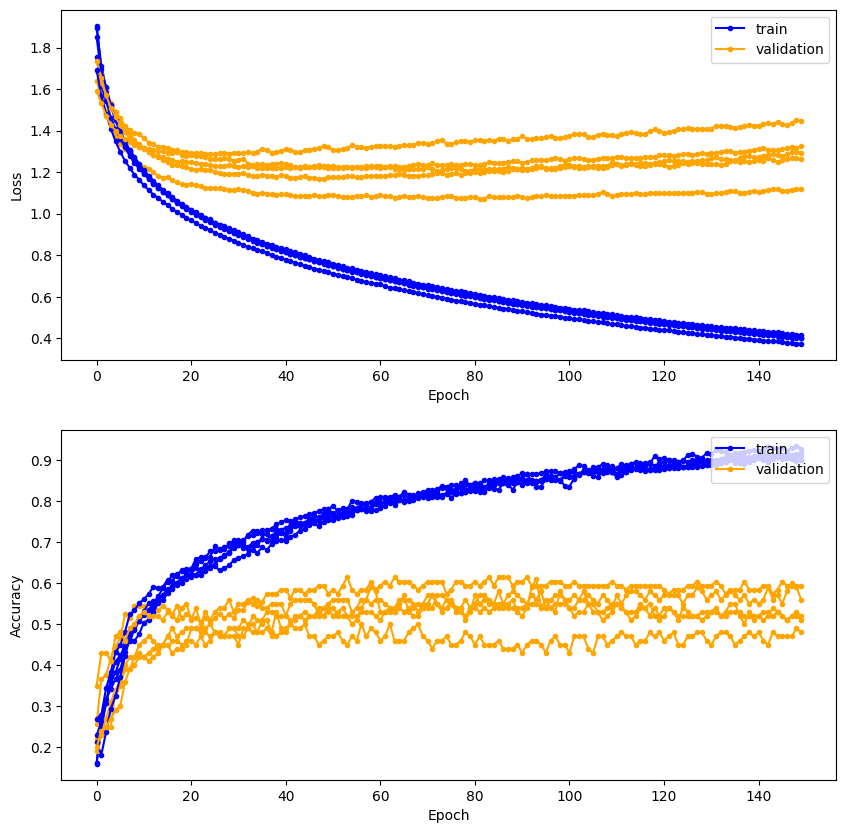

In [20]:

import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))

    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

summarize_diagnostics_combine(histories)

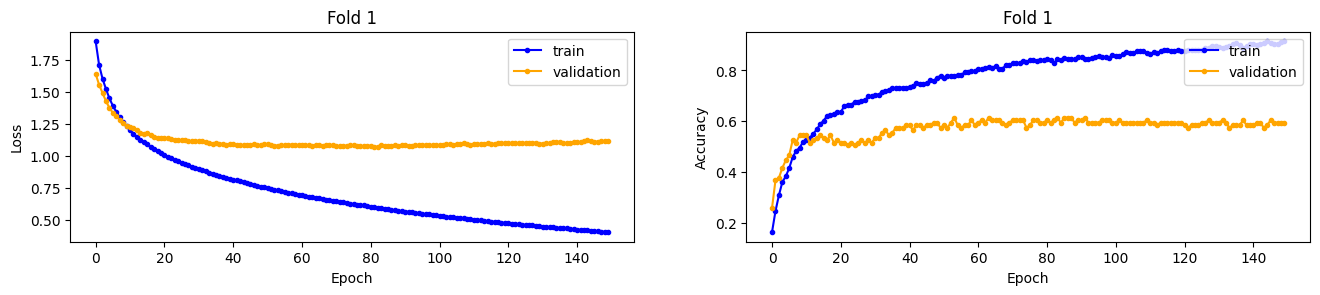

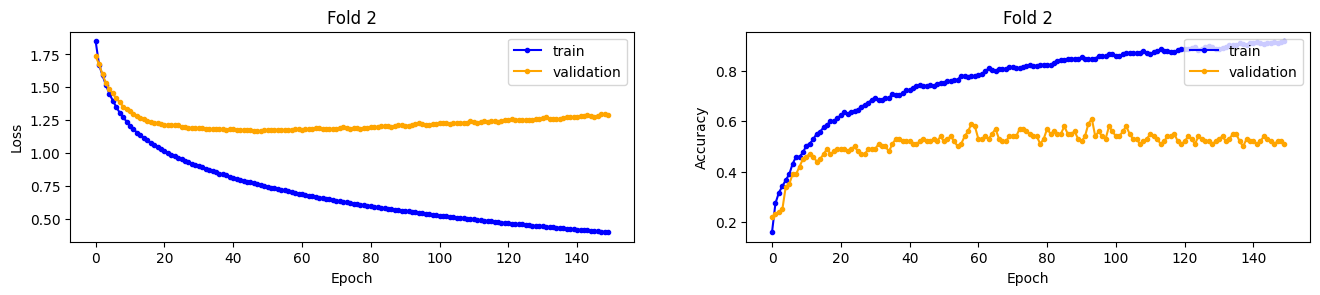

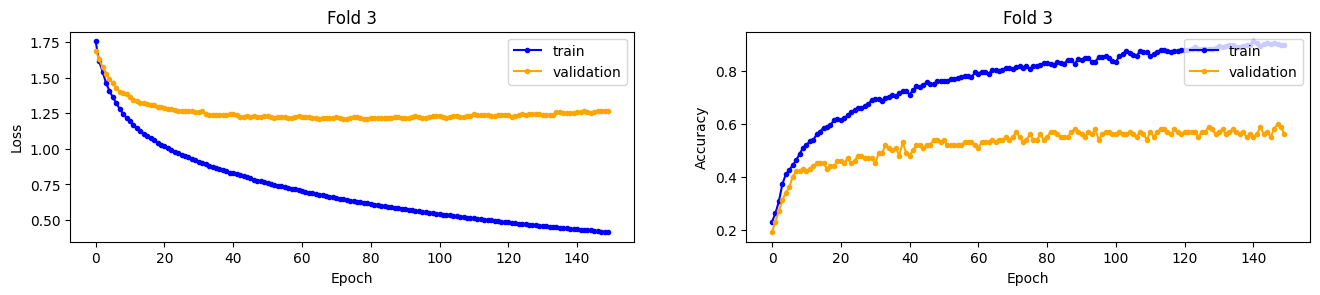

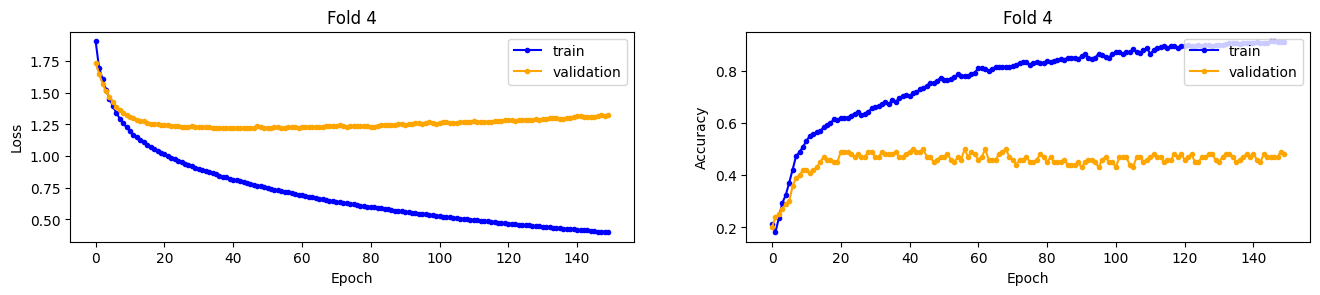

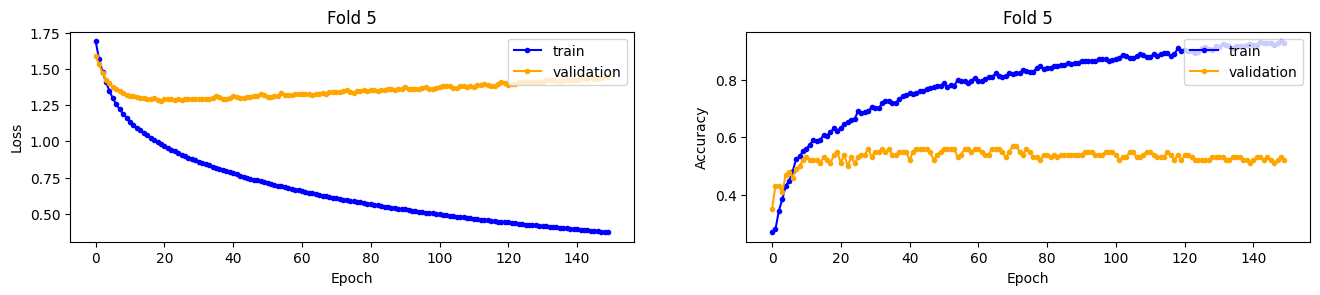

In [21]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()

summarize_diagnostics_single(histories)

Accuracy: mean=53.281 std=3.991, n=5


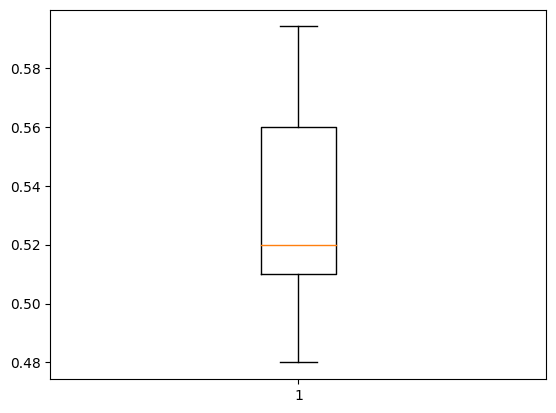

In [22]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

# summarize estimated performance
summarize_performance(scores)

In [23]:
%%time

import pandas as pd

epochs = 150       # ⚠️ SESUAIKAN ⚠️
batch_size = 64   # ⚠️ SESUAIKAN ⚠️

model = define_model_mobilenetv2()

#=======================================================================================================================================#
# CARA 1 : validation_split=0.2 ➜ artinya langsung memecah data train ➜ jadi 80% train & 20% validation ➜ memakan banyak sekali RAM
#          hal ini berarti pula bahwa penggunaan K-Fold itu memberatkan komputasi, coba saja sendiri, terlebih jika data berupa image
#          dan jumlah data hingga ribuan, hal ini akan memakan bayak sekali RAM, bahkan bisa hingga terjadi Out of Memory (OOM). Dan
#          karena alasan ini pula banyak sekali tutorial Image Classification dengan CNN yang tersebar di internet, tidak memakai
#          K-Fold. sebenarnya penggunaan K-Fold itu diperuntukan untuk Machine Learning, bukan Deep Learning, karena alasan komputasi.
#          sebagai alternatif solusinya yaitu gunakan saja pre-trained model terkenal, maka K-Fold tidak terlalu dibutuhkan, bahkan
#          jumlah epoch pun tidak harus banyak. dengan pre-trained model terkenal, meskipun dataset yang digunakan sedikit (misal
#          dibawah 1000), tetap berpotensi besar menghasilkan model yang optimal untuk kasus dataset yang digunakan. dan jika pada
#          saat testing menghasilkan akurasi yang baik, maka hal ini sudah membuktikan bahwa penggunaan K-Fold tidak terlalu dibutuhkan.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 2 : validation_data=(X_test_norm, y_test_encode) ➜ artinya gunakan data validasi dari luar/bukan dari data train yang dipecah
#          ➜ minim penggunaan RAM. CARA 2 ini sebagai alternatif solusi yang baik jika ingin training dengan validasi sekaligus.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_data=(X_test_norm, y_test_encode), epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 3 : TANPA VALIDATION DATA. jika menggunakan CARA 2, malah menghasilkan lebih banyak salah prediksi saat testing data dari internet.
#          hal ini kemungkinan besar akibat terlalu serupanya data train dengan data validasi. Oleh karena itu, dalam kasus ini, karena
#          memang dataset yang sebenarnya hanya sedikit (banyak akibat di augmetasi saja), maka yang dilakukan hanyalah training dan
#          testing saja, tanpa melalui tahapan validasi. namun disamping itu, model yang dihasilkan sudah cukup baik. buktikan saja.
#=======================================================================================================================================#
history = model.fit(X_train_norm, y_train_encode, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/150
8/8 [==============================] - 5s 181ms/step - loss: 1.6625 - accuracy: 0.2435
Epoch 2/150
8/8 [==============================] - 1s 79ms/step - loss: 1.5386 - accuracy: 0.3393
Epoch 3/150
8/8 [==============================] - 1s 81ms/step - loss: 1.4569 - accuracy: 0.3733
Epoch 4/150
8/8 [==============================] - 1s 79ms/step - loss: 1.3847 - accuracy: 0.4172
Epoch 5/150
8/8 [==============================] - 1s 79ms/step - loss: 1.3246 - accuracy: 0.4431
Epoch 6/150
8/8 [==============================] - 1s 80ms/step - loss: 1.2780 - accuracy: 0.4850
Epoch 7/150
8/8 [==============================] - 1s 77ms/step - loss: 1.2361 - accuracy: 0.5030
Epoch 8/150
8/8 [==============================] - 1s 78ms/step - loss: 1.2014 - accuracy: 0.5289
Epoch 9/150
8/8 [==============================] - 1s 78ms/step - loss: 1.1718 - accuracy: 0.5409
Epoch 10/150
8/8 [==============================] - 1s 78ms/step - loss: 1.1464 - accuracy: 0.5449
Epoch 11/150
8/8 [

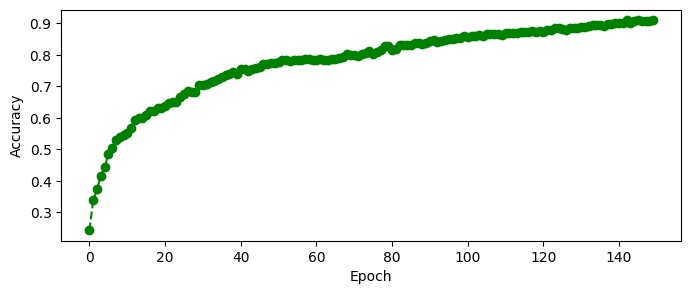

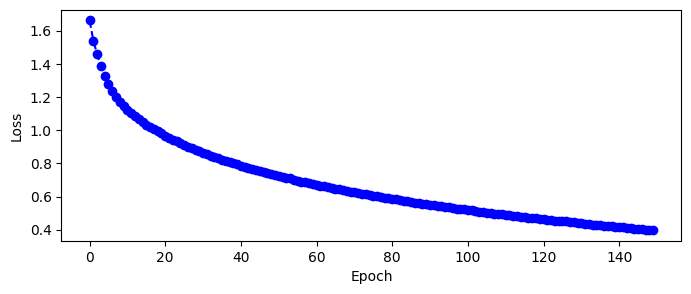

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()


In [25]:
# 01 - Save model as h5
model.save("/content/simpan_model/model_tanpa_kfold.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/simpan_model/model_tanpa_kfold.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)


In [26]:
# 01 - Save model as h5
model.save("/content/simpan_model/model_tanpa_kfold.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/simpan_model/model_tanpa_kfold.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

In [27]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from keras.models import load_model
# Masukkan path model yang dipilih
model = load_model('/content/simpan_model/model_fold_5.h5') # ⚠️ SESUAIKAN ⚠️
#model.summary()

In [28]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del y_validation_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)
y_validation_encode_new   = encoder.fit_transform(y_validation)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred  = model.predict(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
pred_label = np.argmax(pred, axis=-1)
true_label  = np.argmax(y_test_encode_new, axis=-1)                     # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [0 4 3 ... 3 4 1]
Label Sebenarya  : [0 3 3 ... 3 0 4] 

76/76 [==============================] - 6s 50ms/step - loss: 1.7553 - accuracy: 0.3676


In [29]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del y_validation_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)
y_valid_encode_new  = encoder.fit_transform(y_validation)

# ============================================================================ #
# ============================== DATA INTERNET =============================== #
# ============================================================================ #

pred        = model.predict(X_validation_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1)

pred_label  = model.predict(X_validation_norm, batch_size=64, verbose=0)  # label hasil prediksi (probabilitas)
true_label  = np.argmax(y_valid_encode_new, axis=-1)                  # label yang sebenarnya

print("Label Prediksi   :", np.argmax(pred_label, axis=-1))
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_validation_norm, y_valid_encode_new, verbose=1)


Label Prediksi   : [0 0 0 0 0 0 0 3 4 0 0 0 0 0 2 0 0 0 3 1 2 3 2 2 0 3 0 2 4 2 3 1 0 0 0 3 1
 0 0 1 1 0 0 1 1 1 0 1 3 0 0 2 0 1 1 4 0 4 3 4 1 1 0 2 3 3 0 0 0 0 2 0 0 1
 0 0 0 1 0 0 1 0 0 0 3 0 3 2 0 3 4 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 4
 1 0 0 1 4 1 0 1 3 0 1 3 1 3 1 0 0 0 0 1 1 4 4 3 0 1 0 1 0 1 1 0 0 1 1 1 1
 0 0 0 1 2 3 0 1 1 1 0 1 0 1 0 1 1 3 1 0 0 2 1 1 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 2 2 3 2 0 4 0 2 2 2 2 2 3 3 2 2 3 4 3 3 3 2 0 2 1 3 3 1 3 2 4 2 2 2 3 2
 4 4 1 2 2 3 2 4 2 2 2 2 3 4 2 4 3 0 2 1 2 2 3 2 2 3 2 2 2 3 4 2 2 2 3 2 2
 3 2 4 2 2 2 3 3 2 3 3 4 3 3 3 4 2 0 3 2 2 1 1 2 4 3 2 4 3 2 2 4 3 2 3 3 2
 3 4 4 0 3 3 2 3 3 3 3 3 3 3 3 3 3 3 4 2 3 3 3 2 3 2 3 3 1 3 4 4 3 3 3 3 2
 3 0 3 4 2 3 0 3 0 0 3 3 1 3 4 1 3 3 3 3 3 3 2 2 2 3 3 3 0 2 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 1 3 3 4 4 1 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 0 3
 0 4 4 3 2 3 4 3 2 2 2 2 4 4 1 2 4 4 2 4 3 4 4 3 3 2 2 2 4 4 1 1 1 4 2 0 3
 3 3 3 3 2 2 4 4 1 2 2 4 4 1 4 1 0 0 2 3 3 4 4 2 4 1 1 0 1 3 1 2 0 3 0 3 1
 0 3 2

Accuracy : 50.398%
Loss     : 1.340

Classification Report :

               precision    recall  f1-score   support

 cumulunimbus       0.48      0.52      0.49        93
      cumulus       0.55      0.52      0.53        93
 nimbostratus       0.50      0.48      0.49       105
stratocumulus       0.55      0.67      0.60       124
      stratus       0.38      0.28      0.32        87

     accuracy                           0.50       502
    macro avg       0.49      0.49      0.49       502
 weighted avg       0.50      0.50      0.50       502



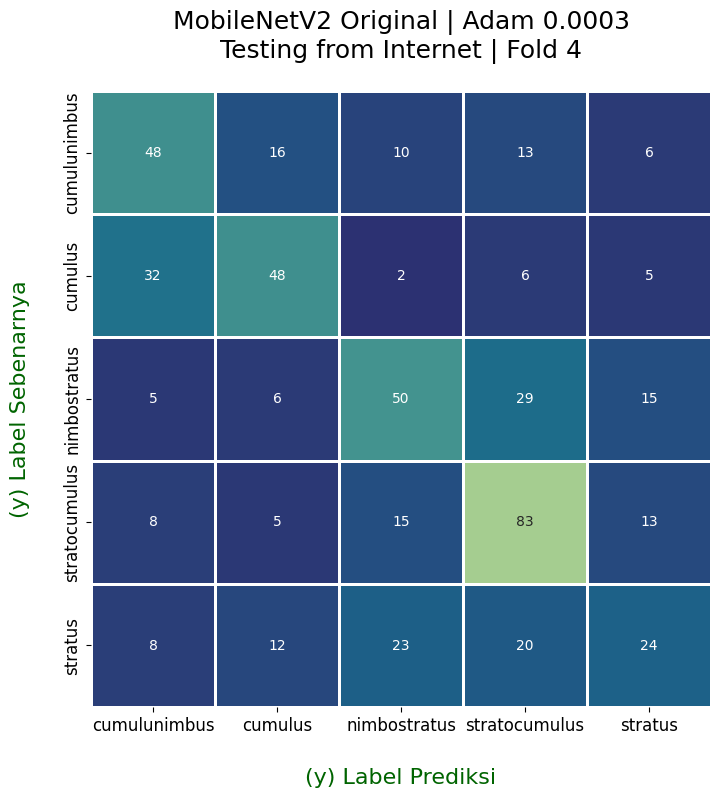

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['cumulunimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']  # ⚠️ SESUAIKAN ⚠️
cmatrix = confusion_matrix(true_label, prediksi)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('MobileNetV2 Original | Adam 0.0003\nTesting from Internet | Fold 4', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()


In [31]:
import pandas as pd

# 01 - Save model as h5
model.save('model.h5') # ⚠️ SESUAIKAN ⚠️

# 02 - Save model report to csv
# model_csv = pd.DataFrame(history.history)
# csv_file = "final_model.csv"
# with open(csv_file, mode="w") as f:
#   model_csv.to_csv(f)

In [32]:
!cp mobilenetv2_original_adam_00003_fold_5.h5 "/content/drive/MyDrive/yoga"
#!cp final_model.csv "drive/My Drive/"

cp: cannot stat 'mobilenetv2_original_adam_00003_fold_5.h5': No such file or directory


In [34]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img
# load an image and predict the class
def run_example(new_data_path):
    # load the image
    img = load_image(new_data_path)
    # load model
    model = load_model('/content/model.h5')    # ⚠️ SESUAIKAN ⚠️
    # predict the class
    result = model.predict(img).argmax(axis=-1)               # ⚠️ OPTION 1 ⚠️ (Hasilnya berbeda dengan OPTION 2, WHY?)
    #result = model.predict(img)                      # ⚠️ OPTION 2 ⚠️ (Hasilnya berbeda dengan OPTION 1, WHY?)
    pred = result[0]
    if pred == 0:                                # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: cumulunimbus")           # ⚠️ SESUAIKAN ⚠️
    elif pred == 1:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: cumulus")         # ⚠️ SESUAIKAN ⚠️
    elif pred == 2:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: nimbostratus")          # ⚠️ SESUAIKAN ⚠️
    elif pred == 3:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: stratocumulus")            # ⚠️ SESUAIKAN ⚠️
    elif pred == 4:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: stratus")       # ⚠️ SESUAIKAN ⚠️


1/1 [==============================] - 1s 1s/step

Hasil Prediksi: cumulunimbus


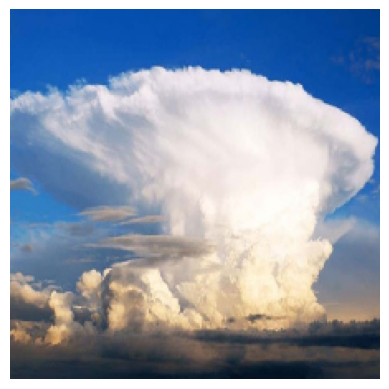

In [35]:
new_data_path = '/content/clouds-51be8e4b85028cffe2a43da3f31126d5_600x400.jpg'  # ⚠️ SESUAIKAN ⚠️
run_example(new_data_path)